1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

Standard deviation : variability within the sample data.

Standard error of the mean : variability of the sample mean itself, relative to the population mean.
    
No chatbot

2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

In the confidence interval will contain 95% of the bootstrapped sample means, assuming the distribution of the sample means is approximately normal

No chatbot

3.  Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.
 
 create a multiple bootstraping data and calculate the sample mean for each sample. Sort them in ascending order. Identify the 2.5th percentile from lower bound and the 97.5th percentile from upper bound of the sorted bootstrapped means.
 
 No chatbot
    

4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

In [2]:
import numpy as np

# Example data
data = np.array([3, 7, 2, 9, 10, 5, 6, 8, 3, 7])

# Function to calculate bootstrap samples
def bootstrap_ci(data, statistic=np.mean, n_bootstrap=10000, ci=95):
    np.random.seed(0)  # for reproducibility
    bootstrapped_stats = []
    
    # Generate bootstrap samples and calculate the statistic for each
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        stat = statistic(sample)
        bootstrapped_stats.append(stat)
    
    # Compute the confidence interval
    lower_bound = np.percentile(bootstrapped_stats, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrapped_stats, 100 - (100 - ci) / 2)
    
    # Return the bounds of the confidence interval
    return lower_bound, upper_bound

# Example: Bootstrap confidence interval for the mean
ci_lower, ci_upper = bootstrap_ci(data, np.mean, 10000, 95)

# Calculate the length of the confidence interval
ci_length = ci_upper - ci_lower

# Print the confidence interval and its length
print(f"95% Confidence Interval for the mean: [{ci_lower}, {ci_upper}]")
print(f"Length of the confidence interval: {ci_length}")


95% Confidence Interval for the mean: [4.4, 7.6]
Length of the confidence interval: 3.1999999999999993


Here's a summary of our conversation:

1. **Bootstrap Confidence Interval in Python**: 
   - We discussed how to create a bootstrap confidence interval. 
   - Steps included resampling data with replacement, calculating a statistic (e.g., mean), and using percentiles to find the confidence interval.

2. **Code Explanation**:
   - I provided a Python function (`bootstrap_ci`) that takes data, a statistic, the number of bootstrap samples, and a confidence level to calculate the interval.
   - We walked through key parts of the code, such as random sampling, calculating the statistic for each resample, and using `np.percentile` to get the confidence interval bounds.

3. **Length of Confidence Interval**:
   - We extended the code to calculate and print the length of the confidence interval by subtracting the lower bound from the upper bound.

If you have any further questions or need additional examples, feel free to ask!


link: https://chatgpt.com/share/66ff5c79-df8c-8004-a720-6fb6bd0e0704

5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

Sample statistic is an estimate, subject to sampling variability.
Confidence interval provides a range where we believe the true population parameter lies

No chatbot

6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.

    a) What is the process of bootstrapping?
 Bootstrapping is a statistical method that taking many random samples from an existing dataset. Bootstrapping sample made by getting random picked data from existing dataset same amount. 
 
    b) What is the main purpose of bootstrapping?
 The main purpose of bootstrapping is to estimate the variability or uncertainty of a sample statistic when we don't know the underlying population distribution or when traditional methods are hard to apply.
    
    c) If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
 First, take many bootstrapped samples from your original dataset maybe 1000 times. Each sample being the same size as your original sample. And calculate the mean for each of these bootstrapped samples. Once this have organized by order, this will give a distribution of bootstrapped means. Now we can create somting call "confidence interval", which is data of ranged midle 95% of bootstrapped samples. Now we can check if the hypothesized mean falls within the 95% confidence interval of bootstrapped means. If the hypothesized mean is inside the confidence interval, it's plausible that the true population mean could be close to your guess. If the hypothesized mean is outside the confidence interval, it's less likely that your guess is correct, based on your sample data.
    
    
No chatbot

7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

If confidence interval includes zero then fail to reject the null hypothesis, which means the drug may not have an effect.
If confidence interval excludes zero, then reject the null hypothesis, which means the drug likely has an effect.

No chatbot

8. Complete the following assignment.Vaccine Data Analysis Assignment

The company AliTech has created a new vaccine that aims to improve the health of the people who take it. Your job is to use what you have learned in the course to give evidence for whether or not the vaccine is effective.

Data AliTech has released the following data.

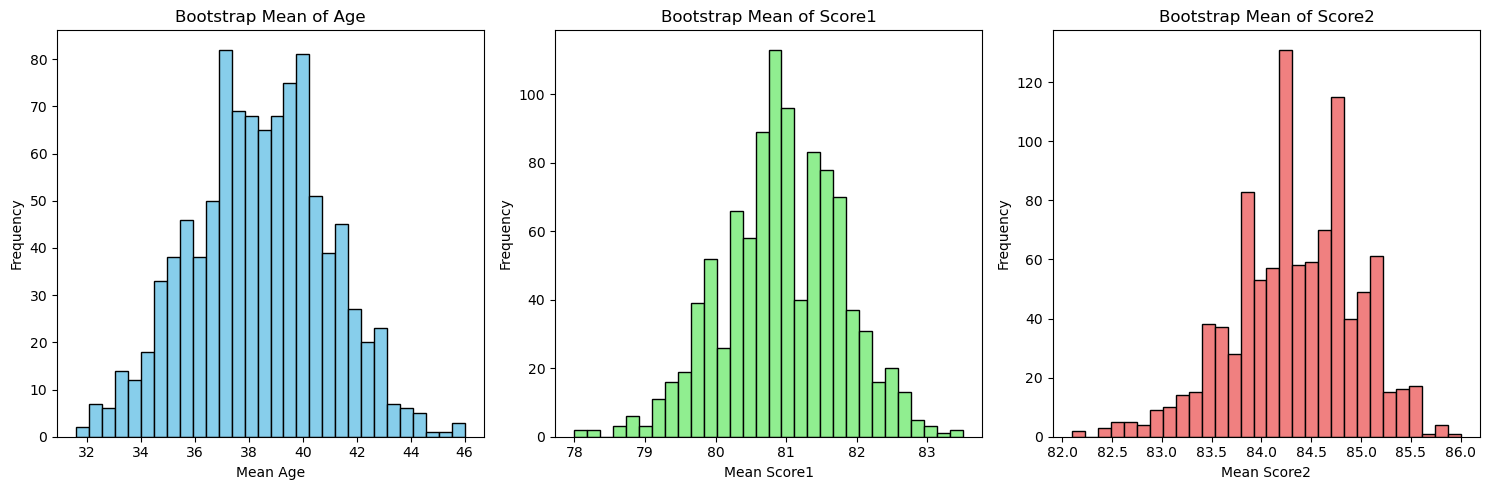

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'Score1': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'Score2': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Set the number of bootstrap samples
n_bootstrap_samples = 1000

# Arrays to store the mean of each bootstrap sample
bootstrap_means_age = []
bootstrap_means_score1 = []
bootstrap_means_score2 = []

# Generate bootstrap samples and calculate means
for _ in range(n_bootstrap_samples):
    sample = df.sample(frac=1, replace=True)  # sample with replacement
    bootstrap_means_age.append(sample['Age'].mean())
    bootstrap_means_score1.append(sample['Score1'].mean())
    bootstrap_means_score2.append(sample['Score2'].mean())

# Plot histograms of the bootstrap means
plt.figure(figsize=(15, 5))

# Histogram for 'Age'
plt.subplot(1, 3, 1)
plt.hist(bootstrap_means_age, bins=30, color='skyblue', edgecolor='black')
plt.title('Bootstrap Mean of Age')
plt.xlabel('Mean Age')
plt.ylabel('Frequency')

# Histogram for 'Score1'
plt.subplot(1, 3, 2)
plt.hist(bootstrap_means_score1, bins=30, color='lightgreen', edgecolor='black')
plt.title('Bootstrap Mean of Score1')
plt.xlabel('Mean Score1')
plt.ylabel('Frequency')

# Histogram for 'Score2'
plt.subplot(1, 3, 3)
plt.hist(bootstrap_means_score2, bins=30, color='lightcoral', edgecolor='black')
plt.title('Bootstrap Mean of Score2')
plt.xlabel('Mean Score2')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


There is a noticeable improvement from the initial health scores (Score1) to the final health scores (Score2), as seen by the higher mean in the right plot compared to the middle plot. This suggests that the vaccine likely has a positive effect on health scores.

Here’s a summary of our conversation:

1. **Dataset Sharing**: You provided a dataset with columns for ID, Age, Gender, Score1, and Score2.

2. **Bootstrap Sampling**: I provided you with Python code to generate 1,000 bootstrap samples from your dataset using pandas.

3. **Mean Calculation and Histogram Creation**: You requested to calculate the mean values of all data and create histograms. I extended the previous code to:
   - Calculate the mean for `Age`, `Score1`, and `Score2` across the bootstrap samples.
   - Plot histograms for the distributions of these means using matplotlib.

If you need any further assistance or have more questions, feel free to ask!

link: https://chatgpt.com/share/66ff641d-3370-8004-aebc-550866e9c28a

9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

yes